# Wine Quality Classification
***


## Classification Analysis

*Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests.*

Red Wine Quality Classification based on the [dataset](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)

## Setup
***

In [1]:
# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Logistic regression.
import sklearn.linear_model as lm

# K nearest neaighbours.
import sklearn.neighbors as nei

# Helper functions.
import sklearn.model_selection as mod

# Fancier, statistical plots.
import seaborn as sns

In [2]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Standard colour scheme.
plt.style.use('ggplot')

## Red Wine Quality Dataset

In [3]:
# Reading Data
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [4]:
# Displaying the data
df.head() #displaying first 5 lines

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [5]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [6]:
# Missing Values
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [7]:
# Standard Deviation
df.std()

fixed acidity            1.741096
volatile acidity         0.179060
citric acid              0.194801
residual sugar           1.409928
chlorides                0.047065
free sulfur dioxide     10.460157
total sulfur dioxide    32.895324
density                  0.001887
pH                       0.154386
sulphates                0.169507
alcohol                  1.065668
quality                  0.807569
dtype: float64

In [8]:
# Create Classification version of target variable
bins = (2, 6.5, 8)
labels = ['goodquality', 'badquality']
df['quality'] = pd.cut(x = df['quality'], bins = bins, labels = labels)

In [9]:
# See proportion of good vs bad wines
df['quality'].value_counts()

goodquality    1382
badquality      217
Name: quality, dtype: int64

## Visualize

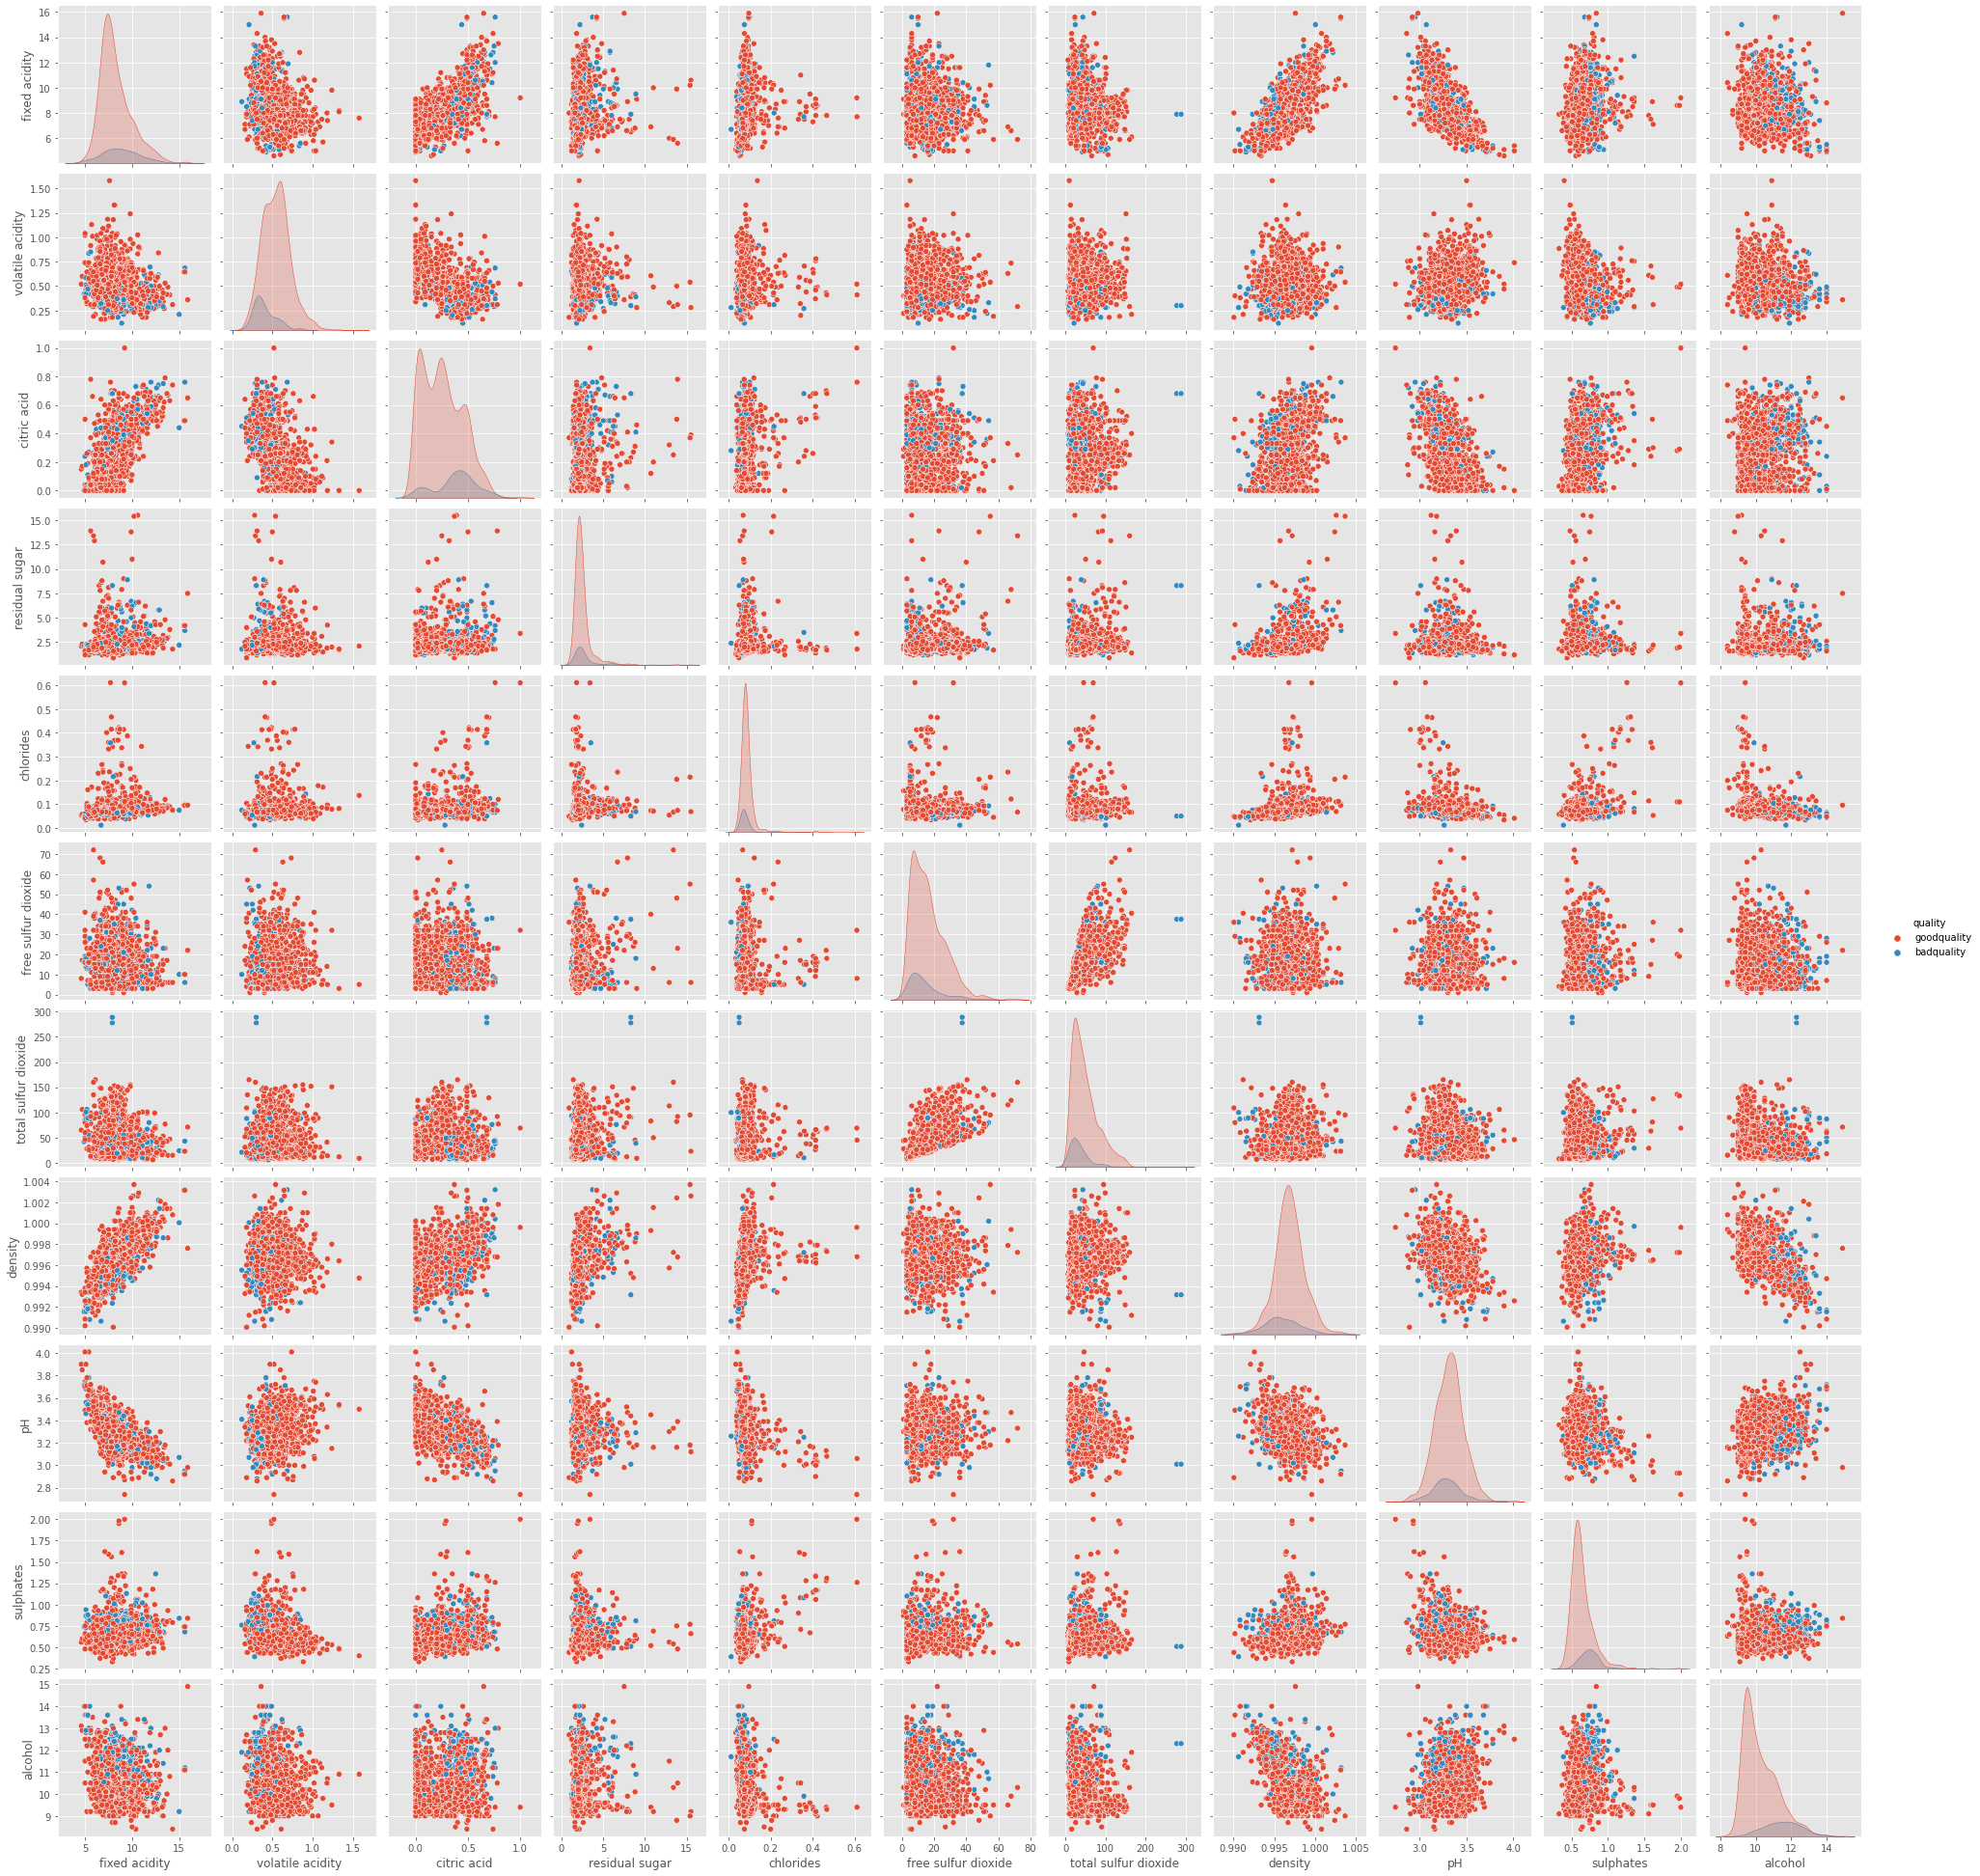

In [10]:
# Scatter plots and kdes. hue = color
sns.pairplot(df, hue='quality');

## Two Dimensions

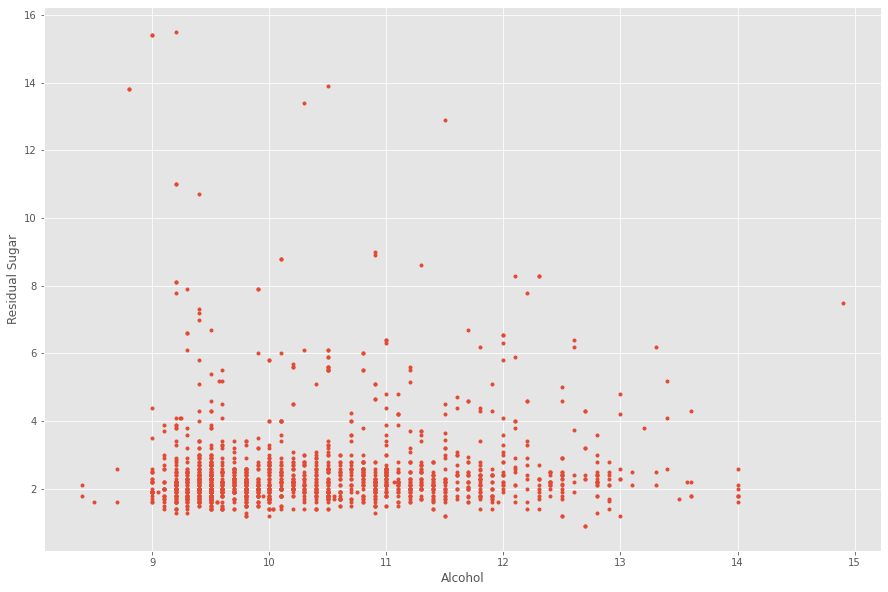

In [11]:
# New figure.
fig, ax = plt.subplots()

# Scatter plot.
ax.plot(df['alcohol'], df['residual sugar'], '.')

# Set axis labels.
ax.set_xlabel('Alcohol');
ax.set_ylabel('Residual Sugar');

## Seaborn

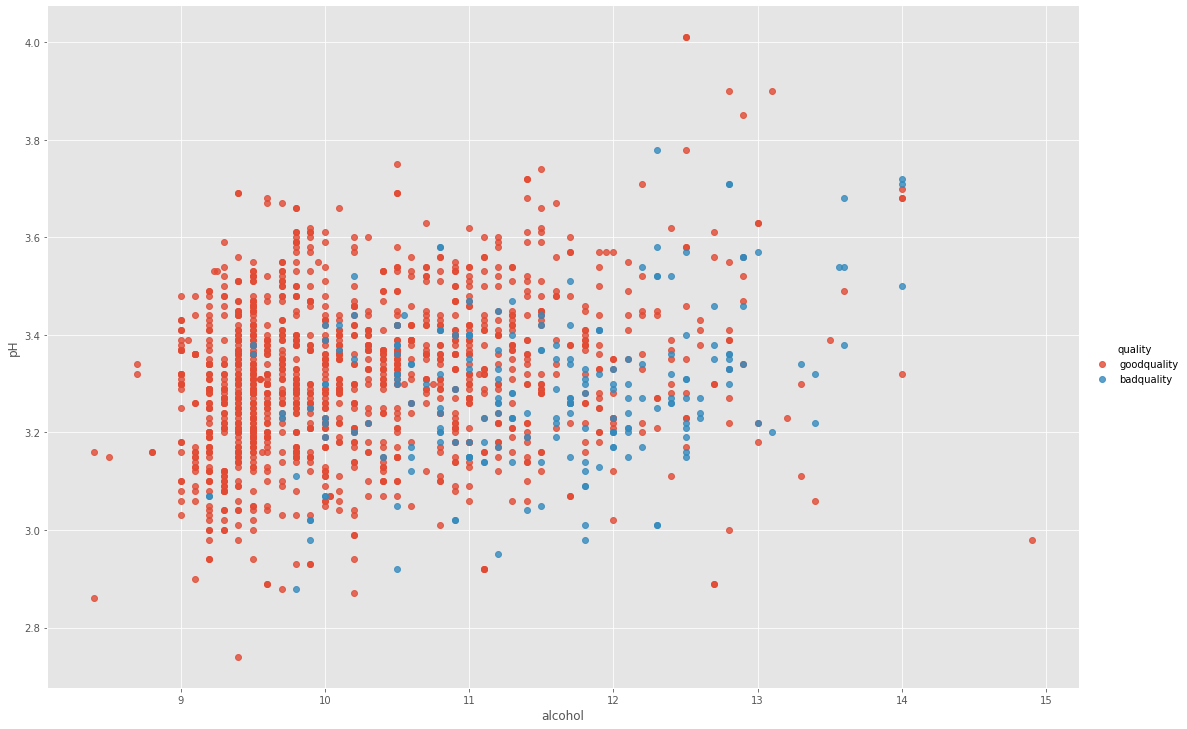

In [12]:
# Seaborn is great for creating complex plots with one command.
sns.lmplot(x="alcohol", y="pH", hue='quality', data=df, fit_reg=False, height=10, aspect=1.5);

<AxesSubplot:>

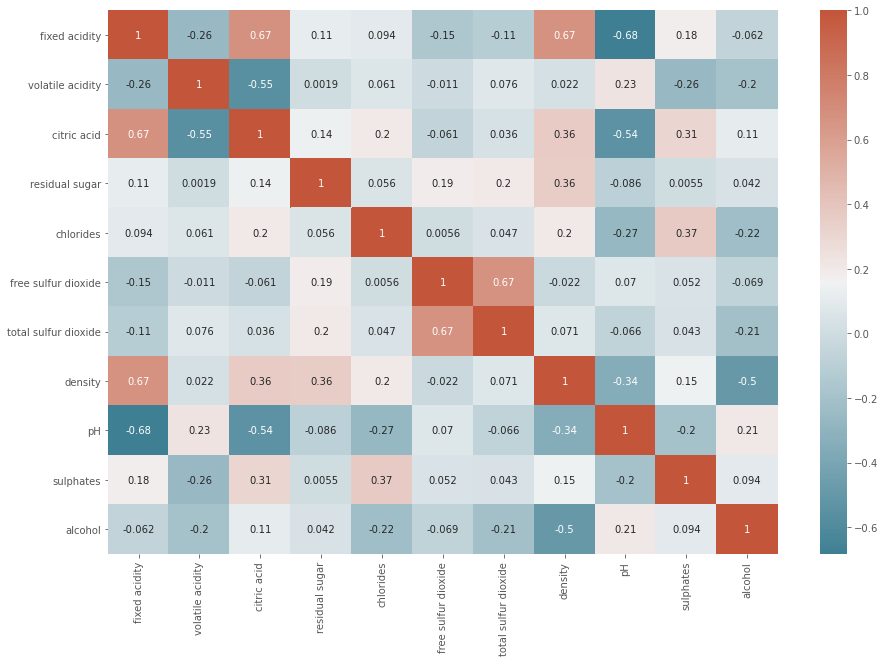

In [13]:
# Correlation Matrix
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

## Using PyPlot

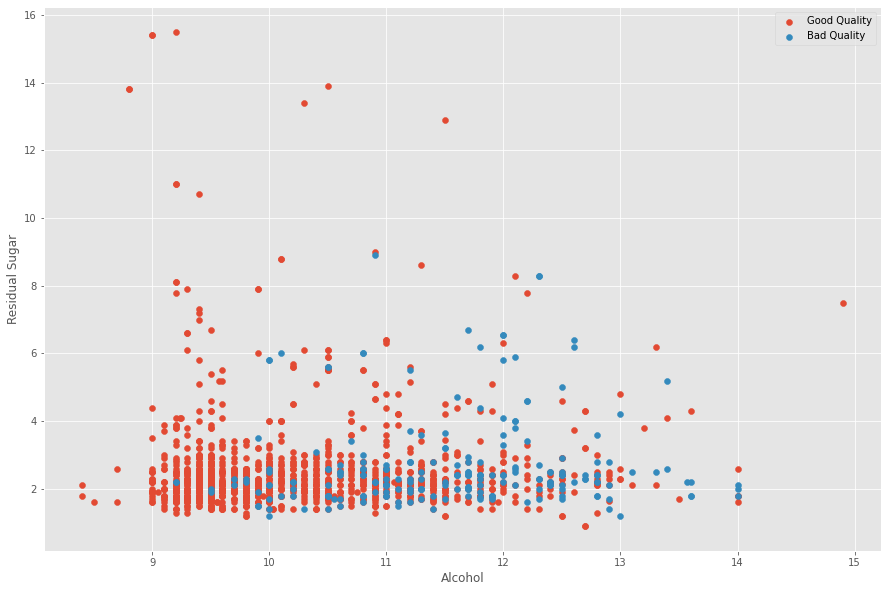

In [14]:
# Segregate the data.
goodquality = df[df['quality'] == 'goodquality']
badquality = df[df['quality'] == 'badquality']

# New plot.
fig, ax = plt.subplots()

# Scatter plots.
ax.scatter(goodquality['alcohol'], goodquality['residual sugar'], label='Good Quality')
ax.scatter(badquality['alcohol'], badquality['residual sugar'], label='Bad Quality')

# Show the legend.
ax.set_xlabel('Alcohol')
ax.set_ylabel('Residual Sugar')
ax.legend();

In [15]:
# How the segregation works.
df['quality'] == 'goodquality'

0       True
1       True
2       True
3       True
4       True
        ... 
1594    True
1595    True
1596    True
1597    True
1598    True
Name: quality, Length: 1599, dtype: bool

In [16]:
# Good Quality wine
df[df['quality'] == 'goodquality'].head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.4              0.70         0.00             1.9      0.076   
1             7.8              0.88         0.00             2.6      0.098   
2             7.8              0.76         0.04             2.3      0.092   
3            11.2              0.28         0.56             1.9      0.075   
4             7.4              0.70         0.00             1.9      0.076   
5             7.4              0.66         0.00             1.8      0.075   
6             7.9              0.60         0.06             1.6      0.069   
9             7.5              0.50         0.36             6.1      0.071   
10            6.7              0.58         0.08             1.8      0.097   
11            7.5              0.50         0.36             6.1      0.071   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                  11.0                  34.0   0.9978  3.51       0.56   
1                  25.0                  67.0   0.9968  3.20       0.68   
2                  15.0                  54.0   0.9970  3.26       0.65   
3                  17.0                  60.0   0.9980  3.16       0.58   
4                  11.0                  34.0   0.9978  3.51       0.56   
5                  13.0                  40.0   0.9978  3.51       0.56   
6                  15.0                  59.0   0.9964  3.30       0.46   
9                  17.0                 102.0   0.9978  3.35       0.80   
10                 15.0                  65.0   0.9959  3.28       0.54   
11                 17.0                 102.0   0.9978  3.35       0.80   

    alcohol      quality  
0       9.4  goodquality  
1       9.8  goodquality  
2       9.8  goodquality  
3       9.8  goodquality  
4       9.4  goodquality  
5       9.4  goodquality  
6       9.4  goodquality  
9      10.5  goodquality  
10      9.2  goodquality  
11     10.5  goodquality

## Using groupby()

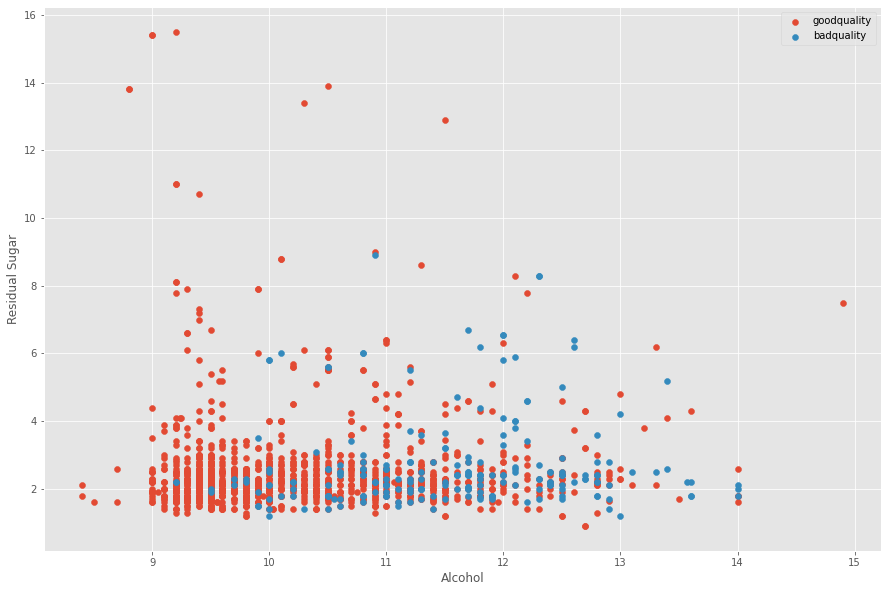

In [18]:
# New plot.
fig, ax = plt.subplots()

# Using pandas groupby().
for quality, data in df.groupby('quality'):
    ax.scatter(data['alcohol'], data['residual sugar'], label=quality)

# Show the legend.
ax.set_xlabel('Alcohol')
ax.set_ylabel('Residual Sugar')
ax.legend();

In [19]:
# Group by typically takes a categorical variable.
x = df.groupby('quality')
x

In [20]:
# Pivot tables.
x.mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                     
goodquality       8.236831          0.547022     0.254407        2.512120   
badquality        8.847005          0.405530     0.376498        2.708756   

             chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                       
goodquality   0.089281            16.172214             48.285818  0.996859   
badquality    0.075912            13.981567             34.889401  0.996030   

                   pH  sulphates    alcohol  
quality                                      
goodquality  3.314616   0.644754  10.251037  
badquality   3.288802   0.743456  11.518049

In [21]:
# Looping through groupby().
for i, j in x:
    print()
    print(f"i is: '{i}'")
    print(f"j looks like:\n{j[:3]}")
    print()


i is: 'goodquality'
j looks like:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol      quality  
0      9.4  goodquality  
1      9.8  goodquality  
2      9.8  goodquality  


i is: 'badquality'
j looks like:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
7             7.3              0.65         0.00             1.2      0.065   
8             7.8              0.58         0.02          

## Test & Train Split

In [22]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [23]:
# Displaying Training Data
train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1133            7.2              0.48         0.07             5.5      0.089   
551             9.4              0.43         0.24             2.8      0.092   
1203            9.9              0.74         0.19             5.8      0.111   
267             7.9              0.35         0.46             3.6      0.078   
775             7.2              1.00         0.00             3.0      0.102   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1133                 10.0                  18.0  0.99684  3.37       0.68   
551                  14.0                  45.0  0.99800  3.19       0.73   
1203                 33.0                  76.0  0.99878  3.14       0.55   
267                  15.0                  37.0  0.99730  3.35       0.86   
775                   7.0                  16.0  0.99586  3.43       0.46   

      alcohol      quality  
1133     11.2   badquality  
551      10.0  goodquality  
1203      9.4  goodquality  
267      12.8   badquality  
775      10.0  goodquality

In [24]:
test.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
683             8.1              0.78         0.23             2.6      0.059   
957             9.5              0.37         0.52             2.0      0.088   
244            15.0              0.21         0.44             2.2      0.075   
757             8.1              0.87         0.00             2.2      0.084   
1266            7.2              0.57         0.05             2.3      0.081   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
683                   5.0                  15.0  0.99700  3.37       0.56   
957                  12.0                  51.0  0.99613  3.29       0.58   
244                  10.0                  24.0  1.00005  3.07       0.84   
757                  10.0                  31.0  0.99656  3.25       0.50   
1266                 16.0                  36.0  0.99564  3.38       0.60   

      alcohol      quality  
683      11.3  goodquality  
957      11.1  goodquality  
244       9.2   badquality  
757       9.8  goodquality  
1266     10.3  goodquality

In [25]:
test.index.size

400

## Two Dimensions: Test Train Split

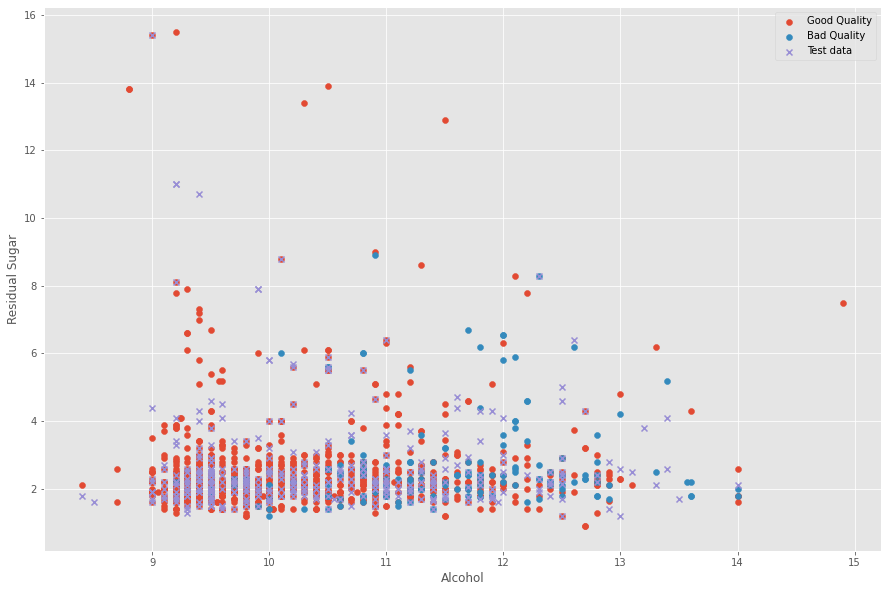

In [26]:
# Segregate the training data.
goodquality = train[train['quality'] == 'goodquality']
badquality = train[train['quality'] == 'badquality']


# New plot.
fig, ax = plt.subplots()

# Scatter plots for training data.
ax.scatter(goodquality['alcohol'], goodquality['residual sugar'], marker='o', label='Good Quality')
ax.scatter(badquality['alcohol'], badquality['residual sugar'], marker='o', label='Bad Quality')


# Scatter plot for testing data.
ax.scatter(test['alcohol'], test['residual sugar'], marker='x', label='Test data')

# Show the legend.
ax.set_xlabel('Alcohol')
ax.set_ylabel('Residual Sugar')
ax.legend();

## Two Dimensions: Inputs & Outputs

In [27]:
# Give the inputs and outputs convenient names.
inputs, outputs = train[['alcohol', 'residual sugar']], train['quality']

In [28]:
inputs.head()

alcohol  residual sugar
1133     11.2             5.5
551      10.0             2.8
1203      9.4             5.8
267      12.8             3.6
775      10.0             3.0

In [29]:
outputs.head()

1133     badquality
551     goodquality
1203    goodquality
267      badquality
775     goodquality
Name: quality, dtype: category
Categories (2, object): ['goodquality' < 'badquality']

## Two Dimensions: Logistic regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [30]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0) #  randomstate - everytime we run the code we get the same random process in the background

# Train the classifier on our data.
lre.fit(inputs, outputs)

LogisticRegression(random_state=0)

In [31]:
# Ask the classifier to classify the test data.
predictions = lre.predict(test[['alcohol', 'residual sugar']])
predictions

array(['goodquality', 'goodquality', 'goodquality', 'goodquality',
       'goodquality', 'goodquality', 'badquality', 'goodquality',
       'goodquality', 'goodquality', 'goodquality', 'goodquality',
       'goodquality', 'badquality', 'goodquality', 'goodquality',
       'goodquality', 'goodquality', 'goodquality', 'goodquality',
       'goodquality', 'goodquality', 'goodquality', 'goodquality',
       'goodquality', 'goodquality', 'goodquality', 'goodquality',
       'goodquality', 'goodquality', 'goodquality', 'goodquality',
       'goodquality', 'goodquality', 'goodquality', 'goodquality',
       'goodquality', 'goodquality', 'goodquality', 'goodquality',
       'goodquality', 'goodquality', 'goodquality', 'goodquality',
       'goodquality', 'badquality', 'goodquality', 'goodquality',
       'goodquality', 'goodquality', 'goodquality', 'goodquality',
       'goodquality', 'goodquality', 'goodquality', 'goodquality',
       'goodquality', 'goodquality', 'goodquality', 'goodquality'

In [32]:
# Eyeball the misclassifications.
predictions == test['quality']

683      True
957      True
244     False
757      True
1266     True
        ...  
63       True
281     False
1410     True
583     False
1195     True
Name: quality, Length: 400, dtype: bool

In [33]:
# What proportion were correct?
lre.score(test[['alcohol', 'residual sugar']], test['quality'])

0.885

## Two Dimensions: Misclassified

In [34]:
# Append a column to the test data frame with the predictions.
test['predicted'] = predictions
test.head()

<ipython-input-34-7f2fd5111565>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted'] = predictions


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
683             8.1              0.78         0.23             2.6      0.059   
957             9.5              0.37         0.52             2.0      0.088   
244            15.0              0.21         0.44             2.2      0.075   
757             8.1              0.87         0.00             2.2      0.084   
1266            7.2              0.57         0.05             2.3      0.081   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
683                   5.0                  15.0  0.99700  3.37       0.56   
957                  12.0                  51.0  0.99613  3.29       0.58   
244                  10.0                  24.0  1.00005  3.07       0.84   
757                  10.0                  31.0  0.99656  3.25       0.50   
1266                 16.0                  36.0  0.99564  3.38       0.60   

      alcohol      quality    predicted  
683      11.3  goodquality  goodquality  
957      11.1  goodquality  goodquality  
244       9.2   badquality  goodquality  
757       9.8  goodquality  goodquality  
1266     10.3  goodquality  goodquality

In [37]:
# Show the misclassified data.
misclass = test[test['predicted'] != test['quality']] #rows in the test dataframe where predicted column does not equal species column
misclass

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
244            15.0             0.210         0.44            2.20      0.075   
128             8.0             0.590         0.16            1.80      0.065   
442            15.6             0.685         0.76            3.70      0.100   
855             7.6             0.735         0.02            2.50      0.071   
498            10.7             0.350         0.53            2.60      0.070   
364            12.8             0.615         0.66            5.80      0.083   
942            10.1             0.430         0.40            2.60      0.092   
901             7.4             0.635         0.10            2.40      0.080   
1459            7.9             0.200         0.35            1.70      0.054   
1541            7.4             0.250         0.29            2.20      0.054   
910             9.3             0.380         0.48            3.80      0.132   
1118            7.1             0.390         0.12            2.10      0.065   
495            10.7             0.350         0.53            2.60      0.070   
946            10.2             0.440         0.58            4.10      0.092   
1125            8.8             0.240         0.35            1.70      0.055   
1433            6.1             0.400         0.16            1.80      0.069   
1287            8.0             0.600         0.08            2.60      0.056   
1086            8.5             0.340         0.40            4.70      0.055   
1134            8.5             0.280         0.35            1.70      0.061   
947             8.3             0.280         0.48            2.10      0.093   
1206            7.2             0.360         0.46            2.10      0.074   
1204            7.2             0.360         0.46            2.10      0.074   
444             5.3             0.570         0.01            1.70      0.054   
265            11.8             0.260         0.52            1.80      0.071   
1192            7.2             0.250         0.37            2.50      0.063   
1555            7.0             0.560         0.17            1.70      0.065   
1006            9.1             0.290         0.33            2.05      0.063   
358            11.9             0.430         0.66            3.10      0.109   
326            11.6             0.530         0.66            3.65      0.121   
1089           11.6             0.410         0.54            1.50      0.095   
1450            7.2             0.370         0.32            2.00      0.062   
949             8.9             0.120         0.45            1.80      0.075   
564            13.0             0.470         0.49            4.30      0.085   
1190            9.1             0.400         0.57            4.60      0.080   
896             8.3             0.310         0.39            2.40      0.078   
357            10.5             0.420         0.66            2.95      0.116   
1126            5.8             0.290         0.26            1.70      0.063   
945            10.2             0.440         0.42            2.00      0.071   
484            10.6             0.440         0.68            4.10      0.114   
366            12.8             0.615         0.66            5.80      0.083   
1075            9.1             0.250         0.34            2.00      0.071   
1111            5.4             0.420         0.27            2.00      0.092   
443            10.0             0.440         0.49            2.70      0.077   
1036            7.6             0.310         0.34            2.50      0.082   
281             7.7             0.270         0.68            3.50      0.358   
583            12.0             0.280         0.49            1.90      0.074   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
244                  10.0                  24.0  1.00005  3.07       0.84   
128                   3.0                  1

In [39]:
# Eyeball the descriptive statistics for the species.
train.groupby('quality').mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                     
goodquality       8.239826          0.546148     0.256095        2.498547   
badquality        8.831138          0.403892     0.371677        2.700299   

             chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                       
goodquality   0.088901            16.283430             48.674419  0.996860   
badquality    0.075012            14.464072             34.826347  0.996043   

                   pH  sulphates    alcohol  
quality                                      
goodquality  3.314128   0.650203  10.256476  
badquality   3.284790   0.742934  11.518962

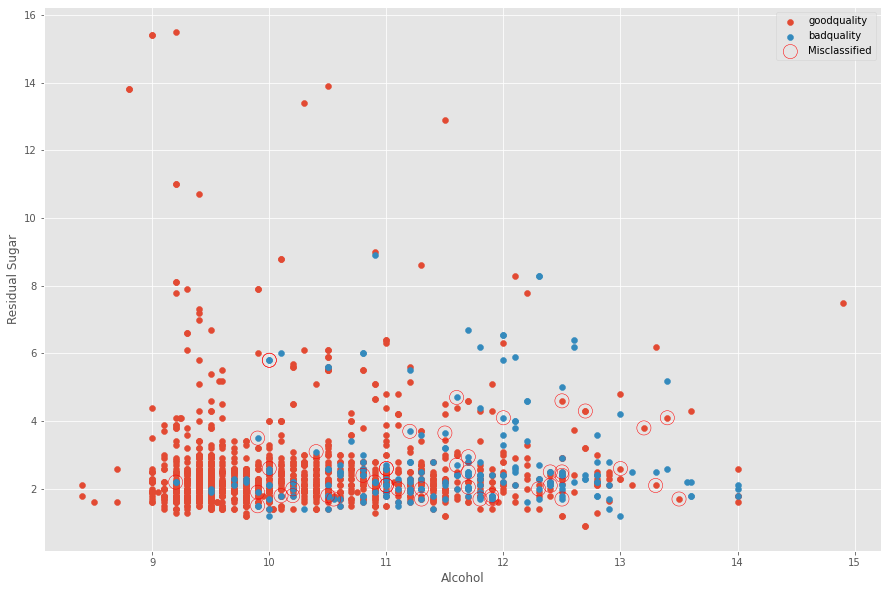

In [40]:
# New plot.
fig, ax = plt.subplots()

# Plot the training data
for species, data in df.groupby('quality'):
    ax.scatter(data['alcohol'], data['residual sugar'], label=species)
    
# Plot misclassified.
ax.scatter(misclass['alcohol'], misclass['residual sugar'], s=200, facecolor='none', edgecolor='r', label='Misclassified')

# Show the legend.
ax.set_xlabel('Alcohol')
ax.set_ylabel('Residual Sugar')
ax.legend();

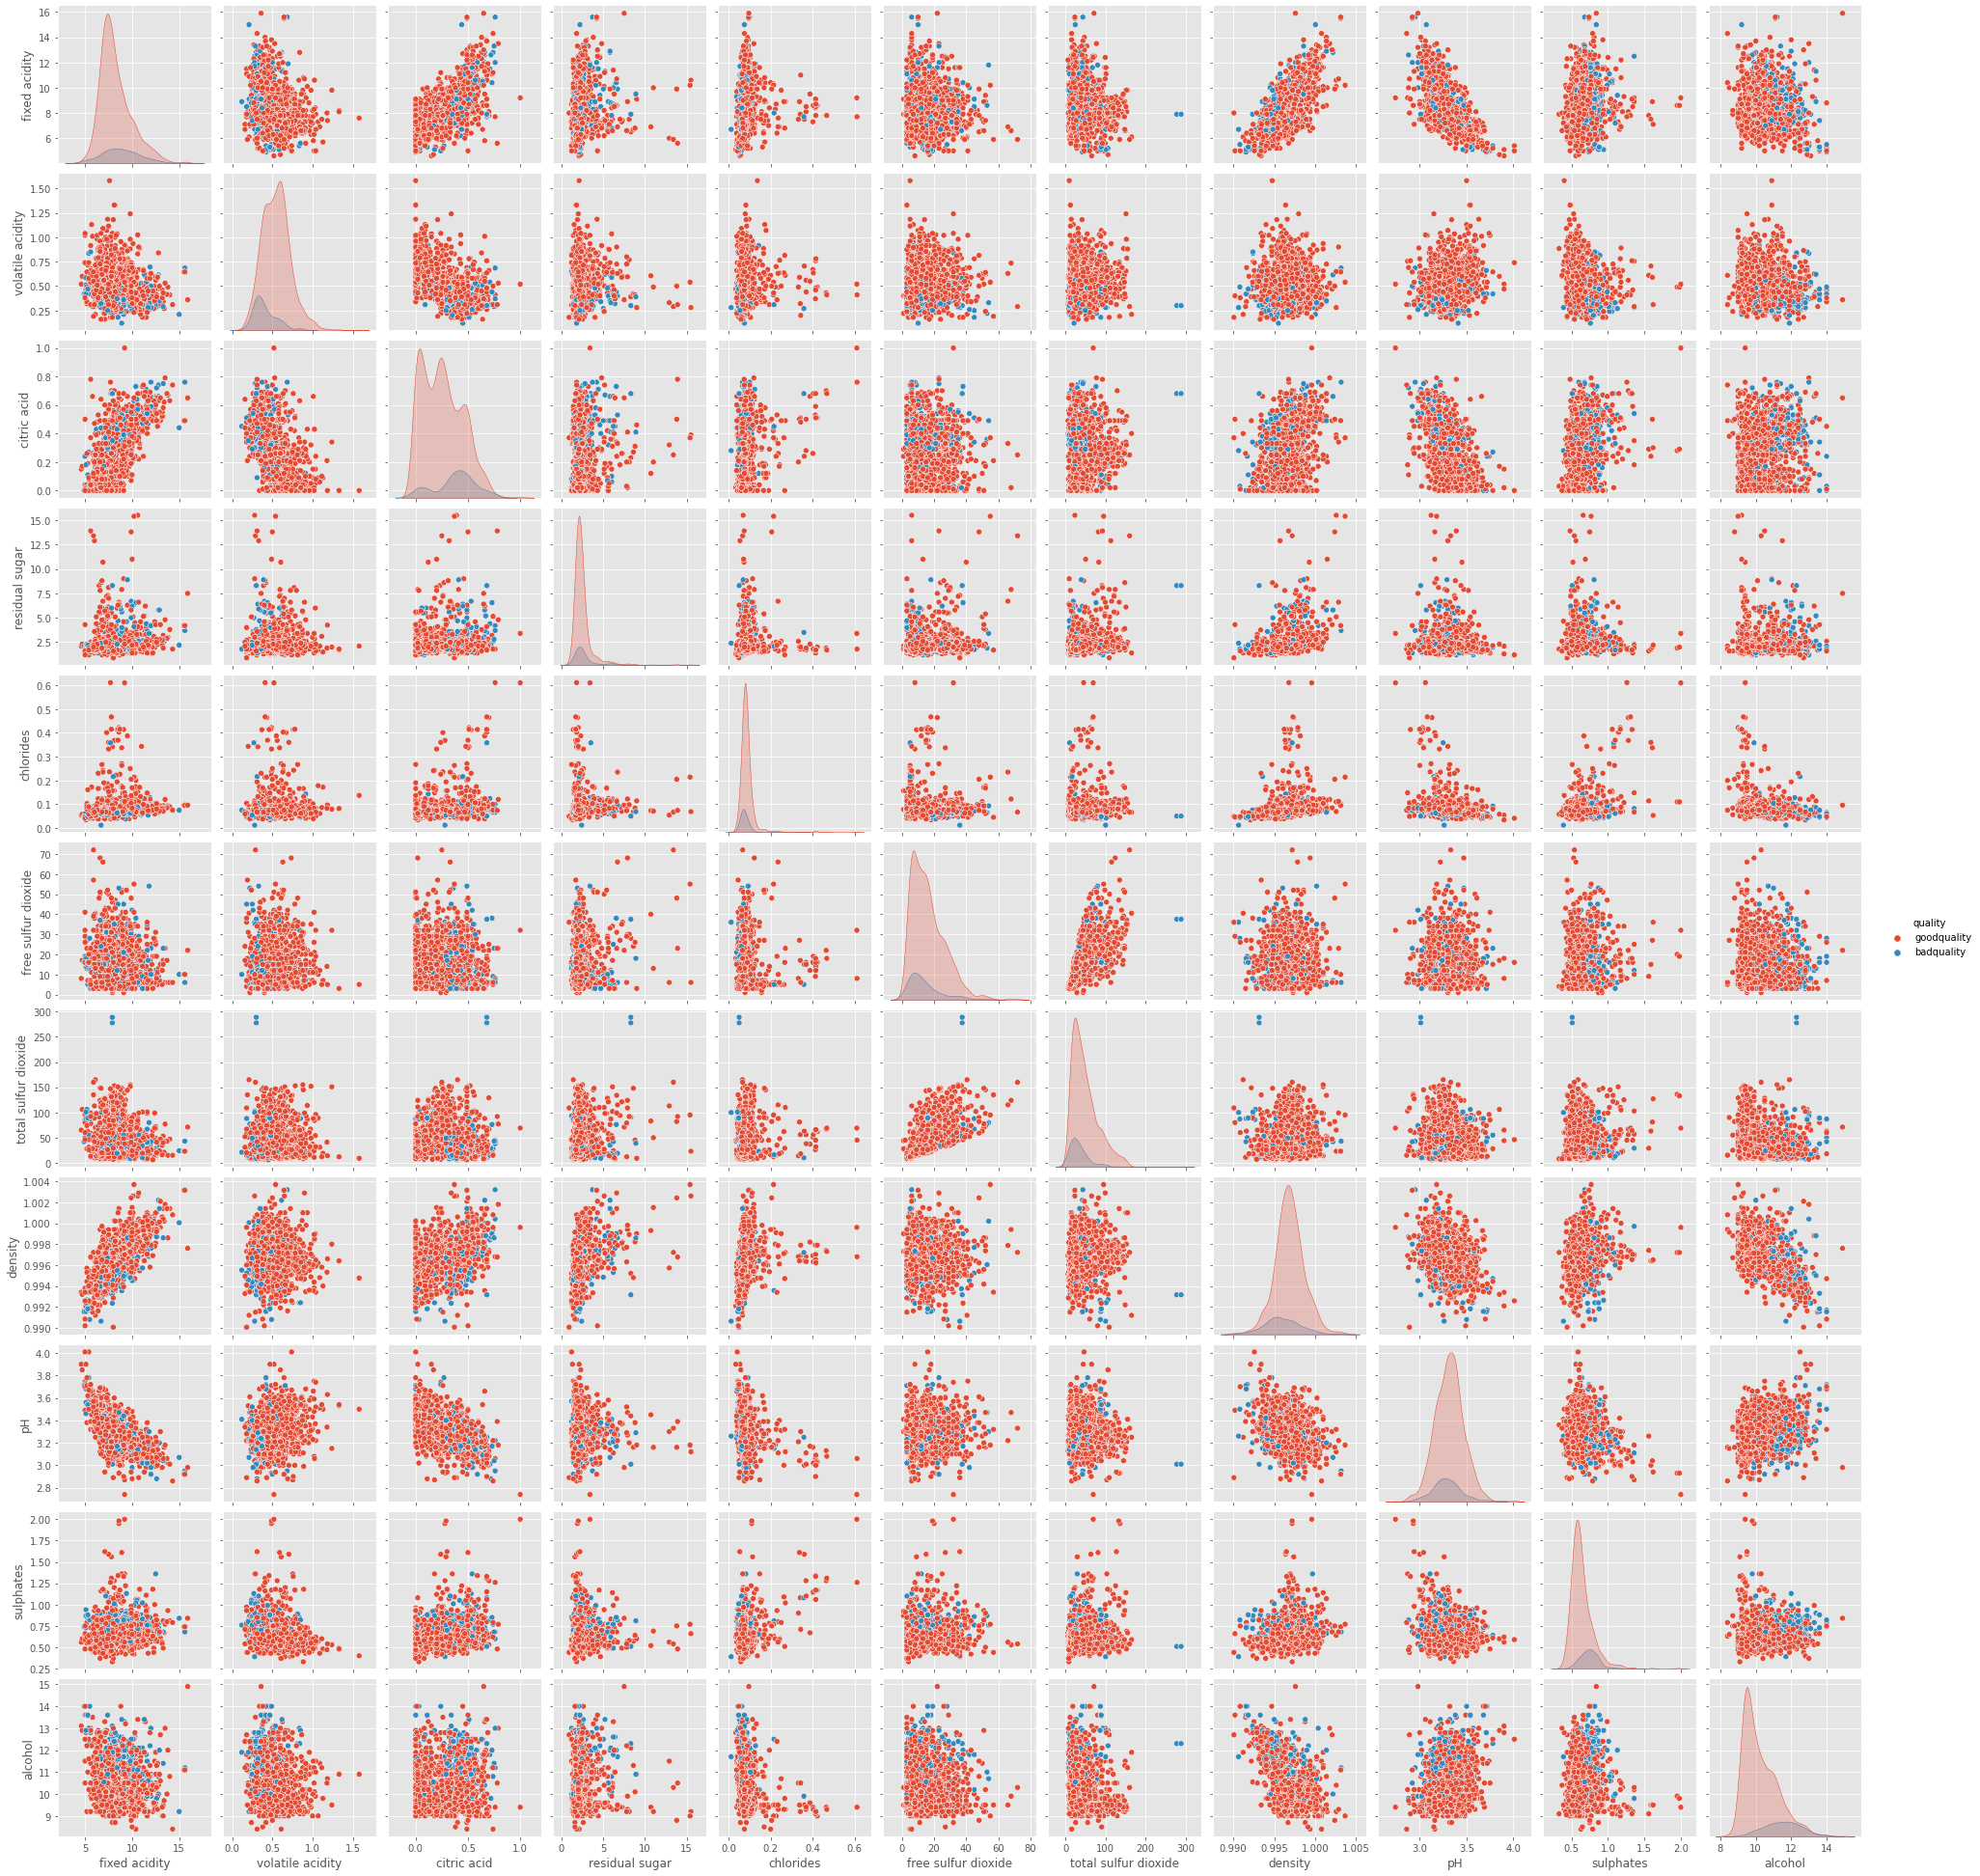

In [41]:
# Another look at this plot.
sns.pairplot(df, hue='quality');

In [42]:
# Give the inputs and outputs convenient names.
inputs = train[['alcohol', 'residual sugar']]

# Set 'versicolor' and 'virginica' to 'other'.
outputs = train['quality'].apply(lambda x: x if x == 'badquality' else 'other') #sets versicolor and virginica to other

# Eyeball outputs
outputs.unique()

['badquality', 'other']
Categories (2, object): ['other' < 'badquality']

In [43]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on our data.
lre.fit(inputs, outputs)

LogisticRegression(random_state=0)

In [44]:
actual = test['quality'].apply(lambda x: x if x == 'alcohol' else 'other')

# What proportion were correct?
lre.score(test[['alcohol', 'residual sugar']], actual)

0.955

## Using all possible Inputs
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [45]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [46]:
# Use all possible inputs.
inputs, outputs = train[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']], train['quality']

In [47]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on our data.
lre.fit(inputs, outputs)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [49]:
# Ask the classifier to classify the test data.
predictions = lre.predict(test[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])
predictions

array(['goodquality', 'goodquality', 'goodquality', 'goodquality',
       'goodquality', 'goodquality', 'goodquality', 'goodquality',
       'goodquality', 'goodquality', 'goodquality', 'goodquality',
       'goodquality', 'goodquality', 'goodquality', 'goodquality',
       'goodquality', 'goodquality', 'goodquality', 'goodquality',
       'goodquality', 'goodquality', 'goodquality', 'goodquality',
       'goodquality', 'goodquality', 'badquality', 'goodquality',
       'goodquality', 'goodquality', 'goodquality', 'goodquality',
       'goodquality', 'goodquality', 'goodquality', 'goodquality',
       'goodquality', 'goodquality', 'goodquality', 'goodquality',
       'goodquality', 'goodquality', 'goodquality', 'goodquality',
       'goodquality', 'goodquality', 'goodquality', 'goodquality',
       'goodquality', 'goodquality', 'badquality', 'goodquality',
       'goodquality', 'goodquality', 'goodquality', 'goodquality',
       'goodquality', 'goodquality', 'goodquality', 'goodquality

In [50]:
# Eyeball the misclassifications.
(predictions == test['quality']).value_counts()

True     356
False     44
Name: quality, dtype: int64

In [51]:
# What proportion were correct?
lre.score(test[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']], test['quality'])

0.89

## $k$ Nearest Neighbours Classifier
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [52]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [53]:
# Use all possible inputs.
inputs, outputs = train[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']], train['quality']

In [54]:
# Classifier.
knn = nei.KNeighborsClassifier()

In [56]:
# Fit.
knn.fit(inputs, outputs)

KNeighborsClassifier()

In [57]:
# Test.
knn.score(test[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']],  test['quality'])

0.865

In [58]:
# Predict.
predictions = lre.predict(test[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])
(predictions == test['quality']).value_counts()

True     352
False     48
Name: quality, dtype: int64

In [59]:
# The score is just the accuracy in this case.
(predictions == test['quality']).value_counts(normalize=True)

True     0.88
False    0.12
Name: quality, dtype: float64

## Cross Validation
https://scikit-learn.org/stable/modules/cross_validation.html

In [60]:
knn = nei.KNeighborsClassifier()
scores = mod.cross_val_score(knn, df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']], df['quality'])
scores

array([0.859375  , 0.8125    , 0.871875  , 0.803125  , 0.87774295])

In [61]:
print(f"Mean: {scores.mean()} \t Standard Deviation: {scores.std()}")

Mean: 0.8449235893416928 	 Standard Deviation: 0.031018521051816114


In [62]:
lre = lm.LogisticRegression(random_state=0, max_iter=1000)
scores = mod.cross_val_score(lre, df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']], df['quality'])
scores

array([0.871875  , 0.85      , 0.896875  , 0.846875  , 0.88714734])

In [63]:
print(f"Mean: {scores.mean()} \t Standard Deviation: {scores.std()}")

Mean: 0.8705544670846395 	 Standard Deviation: 0.019763809442391905


# __END